In [7]:
import pandas as pd 
import os
caminho_arquivo = 'Video_Games_Sales_as_at_22_Dec_2016.csv'
pasta = pd.read_csv(caminho_arquivo)

colunas_excluir=['Critic_Score','Critic_Count','User_Score', 'User_Count', 'Developer','Rating','Platform','Genre',"Year_of_Release" ]

pasta = pasta.drop(columns=colunas_excluir)
print("\nDataFrame Após Remover Colunas:")


display(pasta.head())


DataFrame Após Remover Colunas:


,Name,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
import os 

print(os.listdir(os.getcwd()))

['analise_ga.ipynb', 'Video_Games_Sales_as_at_22_Dec_2016.csv']


In [9]:
pasta['Total_Sales'] = pasta ['NA_Sales'] + pasta['EU_Sales'] + pasta['JP_Sales'] + pasta['Other_Sales']

print(pasta.head())

vendas_globais = pasta.groupby('Name')['Total_Sales'].sum().reset_index()

jogo_mais_vendido = vendas_globais.loc[vendas_globais['Total_Sales'].idxmax()]


print("Jogo mais vendido no ano de 2016:")
display(jogo_mais_vendido)


                       Name Publisher  NA_Sales  EU_Sales  JP_Sales  \
0                Wii Sports  Nintendo     41.36     28.96      3.77   
1         Super Mario Bros.  Nintendo     29.08      3.58      6.81   
2            Mario Kart Wii  Nintendo     15.68     12.76      3.79   
3         Wii Sports Resort  Nintendo     15.61     10.93      3.28   
4  Pokemon Red/Pokemon Blue  Nintendo     11.27      8.89     10.22   

   Other_Sales  Global_Sales  Total_Sales  
0         8.45         82.53        82.54  
1         0.77         40.24        40.24  
2         3.29         35.52        35.52  
3         2.95         32.77        32.77  
4         1.00         31.37        31.38  
Jogo mais vendido no ano de 2016:


Name           Wii Sports
Total_Sales         82.54
Name: 11075, dtype: object

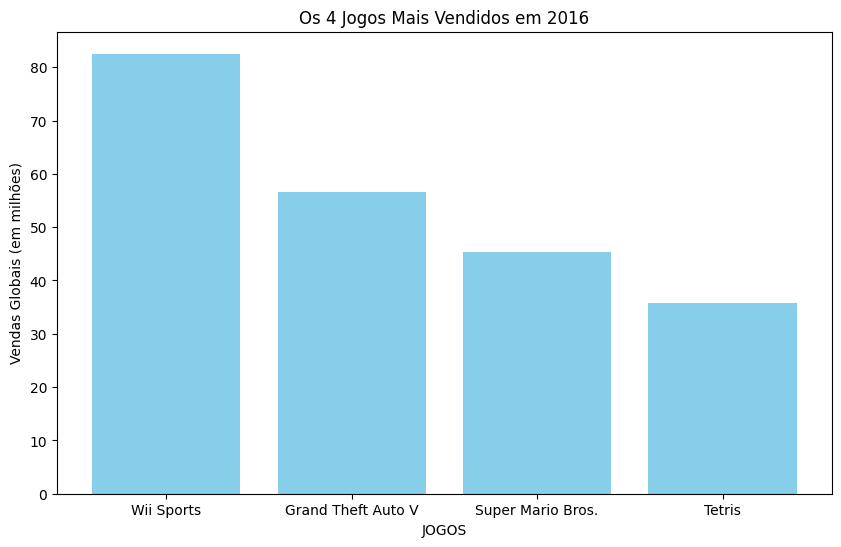

In [10]:
import matplotlib.pyplot as mp

vendas_globais_ordenadas = vendas_globais.sort_values(by='Total_Sales', ascending=False)

top_4_jogos = vendas_globais_ordenadas.head(4)

jogos = top_4_jogos['Name']
vendas = top_4_jogos['Total_Sales']

mp.figure(figsize=(10, 6))
mp.bar(jogos, vendas, color='skyblue')

mp.title('Os 4 Jogos Mais Vendidos em 2016')

mp.xlabel('JOGOS')

mp.ylabel('Vendas Globais (em milhões)')

mp.show()